In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('Copy of customer_retention_dataset 1.xlsx')
df.head()

,1 Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


### The data has 269 rows and 71 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   1 Gender of respondent                                                                                        269 non-null    object
 1   2 How old are you?                                                                                            269 non-null    object
 2   3 Which city do you shop online from?                                                                         269 non-null    object
 3   4 What is the Pin Code of where you shop online from?                                                         269 non-null    int64 
 4   5 Since How Long You are Shopping Online ?                    

In [5]:
print("Number of categorical features : {}".format(len(df.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(df.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 70
Number of numerical features : 1


### Dataset shows that:
    - It had 269 rows and 71 columns
    - No null values (which we can reconfirm with a heatmap)
    - Nos of numerical data = in 1 colum
    - Number of Categorical data = In 70 columns

It is a huge data with lots of information available about users and online shopping. Dissecting it in parts might give us a better understanding of how things are wrt the dataset.

Q1-13 describes the user’s age. gender, places from where they shopped online, devices used and their information
1.	Gender of respondent                                                                                                                                                                                             
2.	How old are you?                                                                                                                                                                                                
3.	Which city do you shop online from?                                                                                                                                                                             
4.	What is the Pin Code of where you shop online from?                                                                                                                                                           
5.	Since How Long You are Shopping Online ?                                                                                                                                                                   
6.	How many times you have made an online purchase in the past 1 year?                                                                                                                                             
7.	How do you access the internet while shopping on-line?                                                                                                                                                          
8.	Which device do you use to access the online shopping?                                                                                                                                                          
9.	What is the screen size of your mobile device?				                                                                                                                                                        
10.	What is the operating system (OS) of your device?				                                                                                                                
11.	What browser do you run on your device to access the website?	                                                                                                                                             
12.	Which channel did you follow to arrive at your favorite online store for the first time?                                                                                                                       
13.	After first visit, how do you reach the online retail store?
-------------------------------------------------------------------------------------------------------				    
Q 14 – 17 and 25/26 gives an idea about how the purchase decision is made/abandoned and the payment options used                                                                                                                                           
14 How much time do you explore the e- retail store before making a purchase decision?                                                                                                                            
15 What is your preferred payment Option?					                                                                                                                                                                    
16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                                                               
17 Why did you abandon the “Bag”, “Shopping Cart”?	
25 Convenient Payment methods           
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time                                                                                                                                                                                                                                                              
------------------------------------------------------------------------------------------------------------
Q 18-24 Information about website, products/sellers			                                                                                                                                                           
18 The content on the website must be easy to read and understand                                                                                                                                                 
19 Information on similar product to the one highlighted  is important for product comparison                                                                                                                     
20 Complete information on listed seller and product being offered is important for purchase decision.                                                                                                            
21 All relevant information on listed products must be stated clearly                                                                                                                                             
 22 Ease of navigation in website                                                                                                                                                                                  
23 Loading and processing speed                                                                                                                                                                                   
24 User friendly Interface of the website  
------------------------------------------------------------------------------------------------------------------------------   
Q 27-71 gives an idea about the shopping experience of the user wrt products, payments, offers, discounts, return/replacement, savings etc     
27 Empathy (readiness to assist with queries) towards the customers                                                                                                                                               
28 Being able to guarantee the privacy of the customer                                                                                                                                                            
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)                                                                                                        
30 Online shopping gives monetary benefit and discounts                                                                                                                                                           
31 Enjoyment is derived from shopping online                                                                                                                                                                      
32 Shopping online is convenient and flexible                                                                                                                                                                     
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                                                                               
34 Gaining access to loyalty programs is a benefit of shopping online                                                                                                                                             
35 Displaying quality Information on the website improves satisfaction of customers                                                                                                                               
36 User derive satisfaction while shopping on a good quality website or application                                                                                                                               
37 Net Benefit derived from shopping online can lead to users satisfaction                                                                                                                                        
38 User satisfaction cannot exist without trust                                                                                                                                                                   
39 Offering a wide variety of listed product in several category                                                                                                                                                  
40 Provision of complete and relevant product information                                                                                                                                                         
41 Monetary savings                                                                                                                                                                                               
42 The Convenience of patronizing the online retailer                                                                                                                                                             
43 Shopping on the website gives you the sense of adventure                                                                                                                                                       
44 Shopping on your preferred e-tailer enhances your social status                                                                                                                                                
45 You feel gratification shopping on your favorite e-tailer                                                                                                                                                      
46 Shopping on the website helps you fulfill certain roles                                                                                                                                                        
47 Getting value for money spent                                                                                                                                                                                  
48  From the following, tick any (or all) of the online retailers you have shopped from;                                                                                                                              
49  Easy to use website or application                                                                                                                                                                                
50 Visual appealing web-page layout                                                                                                                                                                                  
51  Wild variety of product on offer                                                                                                                                                                                  
52  Complete, relevant description information of products                                                                                                                                                            
53  Fast loading website speed of website and application                                                                                                                                                             
54  Reliability of the website or application                                                                                                                                                                         
55  Quickness to complete purchase                                                                                                                                                                                    
56  Availability of several payment options                                                                                                                                                                           
57  Speedy order delivery                                                                                                                                                                                             
58  Privacy of customers’ information                                                                                                                                                                                 
59  Security of customer financial information                                                                                                                                                                        
60  Perceived Trustworthiness                                                                                                                                                                                         
61  Presence of online assistance through multi-channel                                                                                                                                                               
62  Longer time to get logged in (promotion, sales period)                                                                                                                                                            
63  Longer time in displaying graphics and photos (promotion, sales period)                                                                                                                                           
64  Late declaration of price (promotion, sales period)                                                                                                                                                               
65  Longer page loading time (promotion, sales period)                                                                                                                                                                
66  Limited mode of payment on most products (promotion, sales period)                                                                                                                                                
67  Longer delivery period                                                                                                                                                                                            
68  Change in website/Application design                                                                                                                                                                              
69  Frequent disruption when moving from one page to another                                                                                                                                                          
70  Website is as efficient as before                                                                                                                                                                                 
71  Which of the Indian online retailer would you recommend to a friend?                                                                                                                                              


#### We can correlate the columns till no 47 with the rest of the columns for better understanding.

#### Some of the columns have repated values/opinions. Like dis-agree/diasagree.
##### We need to replace these values with one value.


In [6]:
#Replace redundant values
df.replace('indifferent (3)','Indifferent (3)',inplace=True)
df.replace('indifferent  (3)','Indifferent (3)',inplace=True)
df.replace('Dis-agree (2)','Disagree (2)',inplace=True)

(0.0, 71.0, 269.0, 0.0)

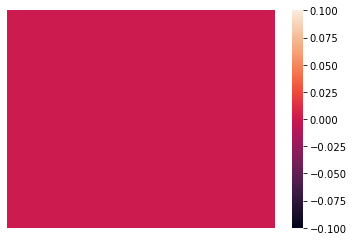

In [7]:
sns.heatmap(df.isnull())
plt.axis('off')

### Above heatmap shows that dataset has no null values in it.

In [8]:
df.shape #shows columns and rows

(269, 71)

### Let's find the names of each column:

In [9]:
df.columns

Index(['1 Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?',
       '16 How frequently do you abandon (se

#### Five major factors that contributed to the success of an e-commerce store have been identified as: 
- service quality 
- system quality
- information quality
- trust and net benefit. 
#### It also shows the factors that influence the online customers repeat purchase intention

In [10]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
df

,1 Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart""?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,A

# EDA

### Visulatization of the data

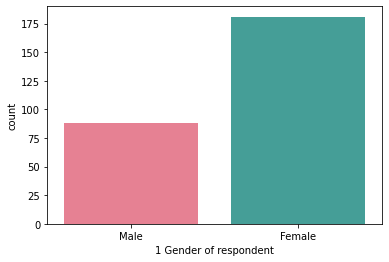

In [11]:
import seaborn as sns
a = sns.countplot(x="1 Gender of respondent", data=df, palette="husl")

This is the graphical representation showing what is the count of the gender involved in online shopping.
- It shows that around 80 males and 175 females prefer online shopping, and the number of females is more than the number of males.

<AxesSubplot:xlabel='2 How old are you?', ylabel='count'>

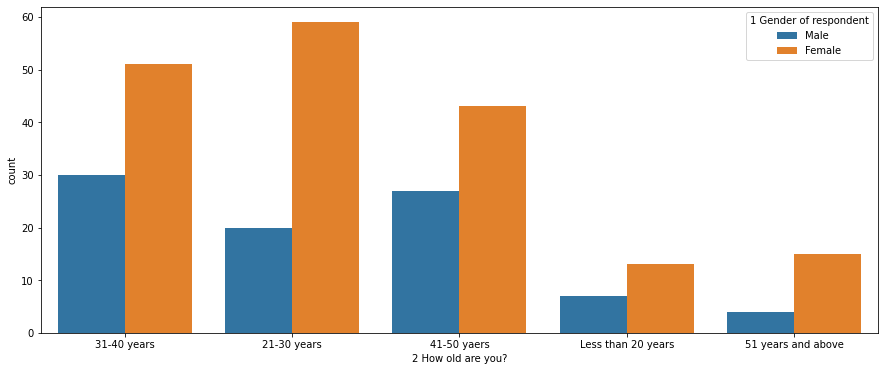

In [12]:
plt.figure(figsize = (15,6))
sns.countplot(x="2 How old are you?", hue="1 Gender of respondent", data=df)

- The data shows that population between 21-30 years shop more online, and the number of females are 3x more than the number of males.
- Following, the age group between 31-40 years shop more online too, although here the number of males is more than males in the age group of 21-30 yo.
- The least shopping age group is 51 years and above. 
- In all the age groups the  females seem to be preferring shopping online more than the males.

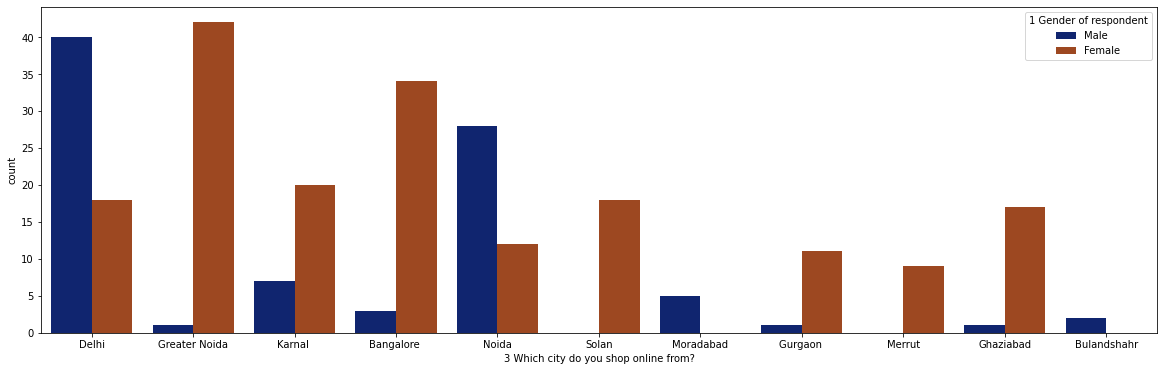

In [13]:
plt.figure(figsize = (20,6))
c=sns.countplot(x="3 Which city do you shop online from?", hue="1 Gender of respondent",palette="dark",data=df)

- 11 cities were surveyed, namely Delhi,Greater Noida, karnal,Bangalore, Noida, Solan,Moradabad,Gurgaon,Merrut, Ghaziabad, Bulandshahr.
- Delhi and Greater Noida shows contrast in online shopping behaviour.
- Delhi has more male population shopping than the females, where as Greater is opposite to it, where the number of females  shopping online are almost 25% more than the male population.
- Again, Noida has more males shopping online than the females.
- Solan and Merrut doesnt show any males preferring to shop online.
- Moradabad and Bulandshahr are contrary to Solan and Merrut, where females dont seem to prefer online shopping.
- Ghaziabad has a very low male population, similar to Gurgaon.
- Overall,In these cities female population seems to be shopping online more than the males, specially in the metro/big cities.

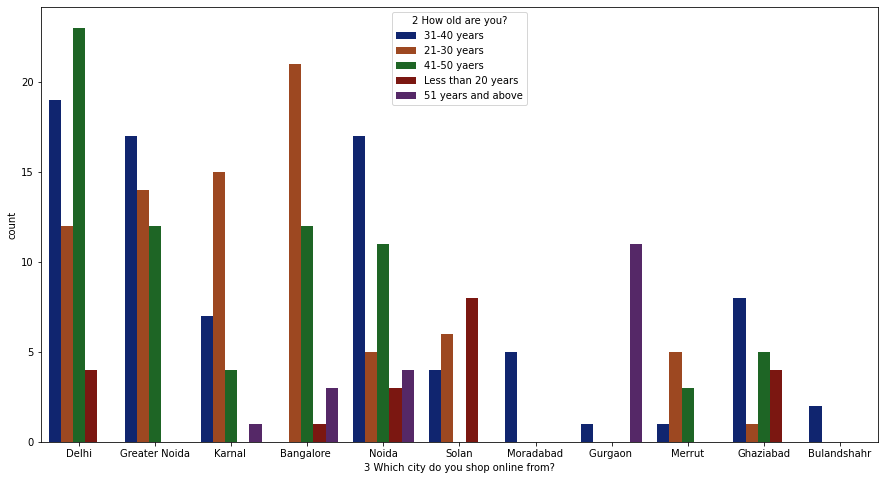

In [14]:
plt.figure(figsize = (15,8))
d=sns.countplot(x="3 Which city do you shop online from?", hue="2 How old are you?",palette="dark",data=df)

Surveying the online shoppping customers following observations were found:

    -Least population prefered online shopping in Moradabad, Bulandshahr and Gurgaon. Although Gurgaon showed an interestig observation that people above 51 years shopped online more.
    - The 5 cities involved in online shopping were Delhi>Greater Noida>Bangalore>Noida>Karnal
    - Delhi showed population between 41-50 to shop most, Greater Noida had population between 31-40 yrs old, Bangalore - 21-30, Noida:31-40yo, And karnal 21-30yo.

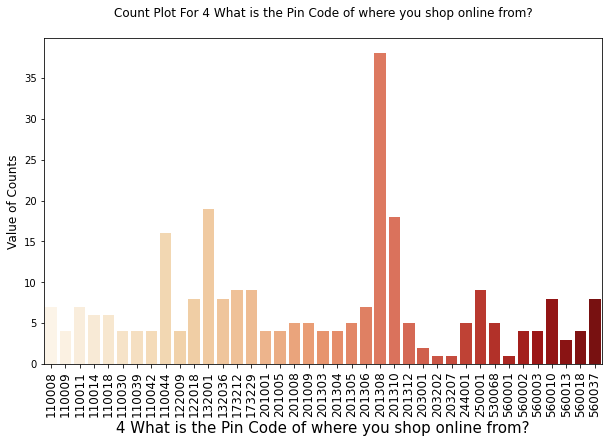

In [15]:
plt.figure(figsize = (10,6))
col_name = '4 What is the Pin Code of where you shop online from?'
values = df[col_name].value_counts()
index = 0
f = sns.countplot(df[col_name], palette = 'OrRd')
plt.title(f'Count Plot For {col_name}\n', fontsize = 12)
plt.xlabel(col_name, fontsize = 15)
plt.ylabel(f'Value of Counts', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

The pincode 201308 (Greater Noida), followed by 132001 (Karnal), followed by 201310(Ghaziabad) were the pincodes from where people shopped more online.
while least were from the pincodes 203202 (Bulandshahr),203207, 560001 (Bangalore).

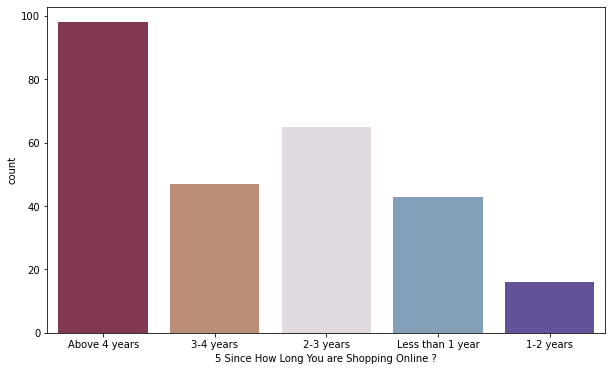

In [16]:
plt.figure(figsize = (10,6))
e=sns.countplot(x="5 Since How Long You are Shopping Online ?",palette="twilight_shifted_r",data=df)


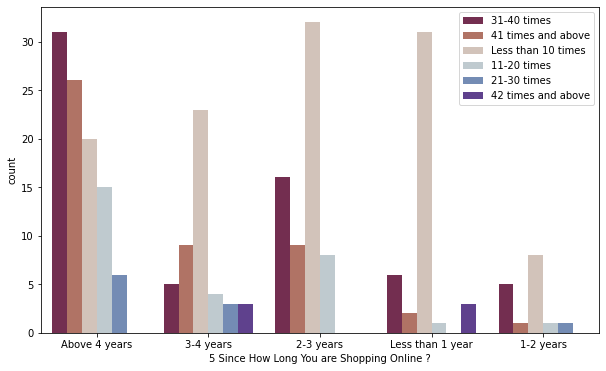

In [17]:
plt.figure(figsize = (10,6))
e=sns.countplot(x="5 Since How Long You are Shopping Online ?", hue="6 How many times you have made an online purchase in the past 1 year?",palette="twilight_shifted_r",data=df)
plt.legend(prop = {'size':10}, loc = 'best')

The survey showed how long people have been shopping online and how many times they have purchased online in last 1 year.

- Most people have been shopping online since more than 4 years. And least people were shopping online since 1-2 years.
- In the more than 4 years category, maximum people have shopped around 40 times in the past 1 years, followed by people who have shopped more than40 times in last 1 year.
- The least interest people who shopped online seem to have shopped less than 10 times in last 1 year.

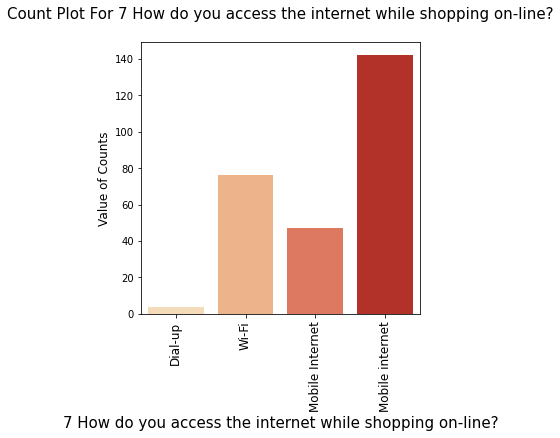

In [18]:
plt.figure(figsize = (5,5))
col_name = '7 How do you access the internet while shopping on-line?'
values = df[col_name].value_counts()
index = 0
g = sns.countplot(df[col_name], palette = 'OrRd')
plt.title(f'Count Plot For {col_name}\n', fontsize = 15)
plt.xlabel(col_name, fontsize = 15)
plt.ylabel(f'Value of Counts', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

Most people who shopped online preferred shopping online via mobile internet, while least people used the traditiona Dial-up method to use for online shopping.

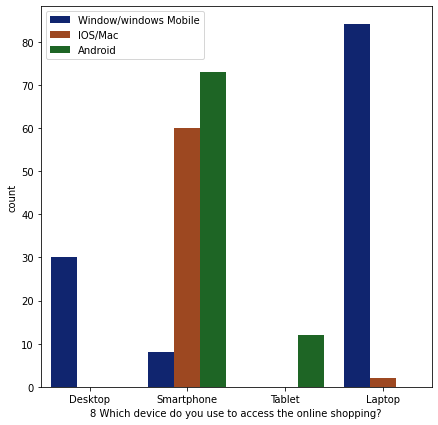

In [19]:
plt.figure(figsize = (7,7))
d=sns.countplot(x="8 Which device do you use to access the online shopping?",hue="10 What is the operating system (OS) of your device?",
                palette="dark",data=df)
plt.legend(prop = {'size':10}, loc = 'upper left')

- Maximum people preferred to use smartphone to shop online for their needs, followed by laptop.
- Of all the devices people used for online shopping, Windows/Windows mobile OS was mostly used.
- Only in the Tablet device,Android OS was used, while desktop device showed the use of Windows only.
- Smartphone showed maximum use of Android OS followed by iOS/MAC.
- Laptop device as usual showed maximum use of Windows OS, and very less iOS use by the people.

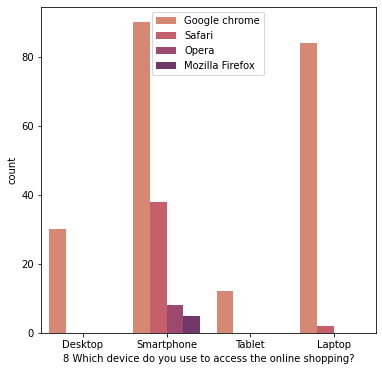

In [20]:
plt.figure(figsize = (6,6))
d=sns.countplot(x="8 Which device do you use to access the online shopping?",
                hue='11 What browser do you run on your device to access the website?',
                palette="flare",data=df)
plt.legend(prop = {'size':10}, loc = 'best')

- The browsers which were used by the people for oonline shopping were Google Chrome, Safari, Opera, and Mozilla Firefox.
- From these maximum use of Google Chrome was done on a smartphone and Laptop for online purchases.
- Laptop users used safari the least, while smartphone users used Firefox the least.
- Desktop and tablet users only used Chrome.
- Opera was only used was smartphone users.

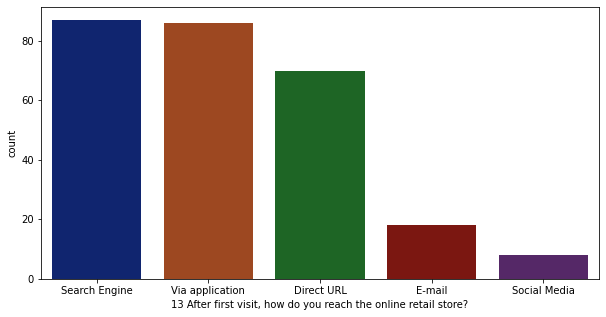

In [21]:
plt.figure(figsize = (10,5))
d=sns.countplot(x='13 After first visit, how do you reach the online retail store?',palette="dark",data=df)

People must have visited  a shop in person for first time, but makinga  second purchase they must have chose an online option:

    - Almost 80% of the population used search engine and apps of the store to get to the retail store website.
    - Least used the means of Social media to reach theire online retail store.
    - Around 70% used URL of the store too. 
    - Email was used by the population but it was merely around 20%.

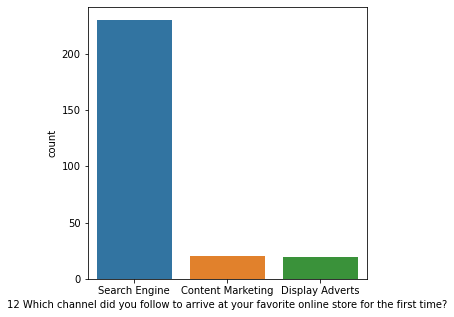

In [22]:
plt.figure(figsize = (5,5))
d=sns.countplot(x='12 Which channel did you follow to arrive at your favorite online store for the first time?',data=df)

Search engine was the most used channel by the population to get to their favorite online store for shopping, while Digital Advertizing played a very less role in this as people used these channels like Content marketing and Display Adverts very less, compared to using the search engine.

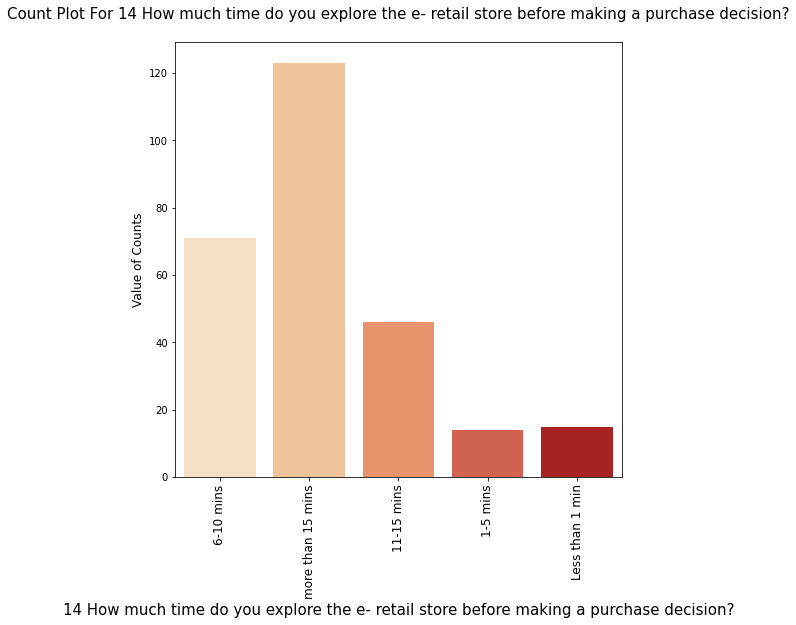

In [23]:
plt.figure(figsize = (8,8))
col_name = '14 How much time do you explore the e- retail store before making a purchase decision?'
sns.countplot(df[col_name], palette = 'OrRd')
plt.title(f'Count Plot For {col_name}\n', fontsize = 15)
plt.xlabel(col_name, fontsize = 15)
plt.ylabel(f'Value of Counts', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

Most pople seem to have utilized more than 15 mins to make a single purchase. While around 17% of the people made their purchase decision between 1-5 mins.

<AxesSubplot:xlabel='15 What is your preferred payment Option?', ylabel='count'>

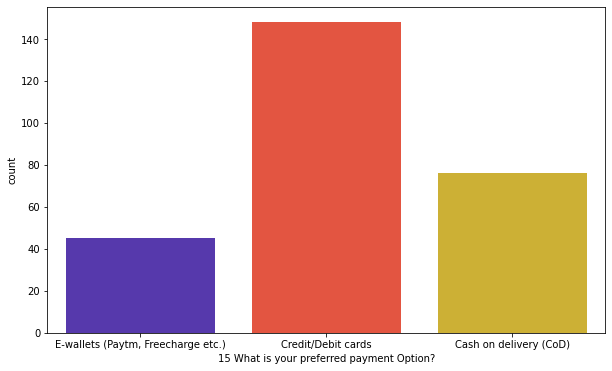

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(x="15 What is your preferred payment Option?", 
                palette="CMRmap",data=df)

Maximum people preferred to pay via Credit/debit cards when it came to online shopping, while least of the population used e_wallets. Mediocre people paid by COD

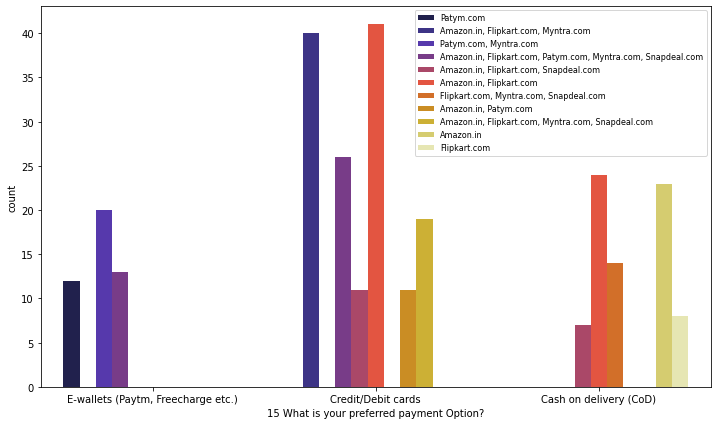

In [25]:
plt.figure(figsize = (12,7))
sns.countplot(x="15 What is your preferred payment Option?", 
                hue='Availability of several payment options',palette="CMRmap",data=df)
plt.legend(prop = {'size':8}, loc = 'upper right')

- Of the max use of cards, people seem to have used the cards more on Amazon, flipkart and myntra.
- In E wallets, most preferred using the ewallets on PayTm and Myntra.
- CoD was mostly used on the shopping websites Amazon, Flipkart, Myntra and snapdeal.

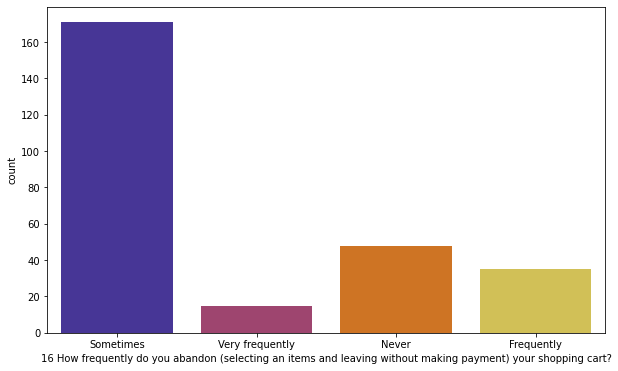

In [26]:
plt.figure(figsize = (10,6))
d=sns.countplot(x='16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?',
               palette="CMRmap",data=df)

Most of the online shoppers abandoned their carts without making the purchases, sometimes. While the frequency of people doing that very frequently was very less.

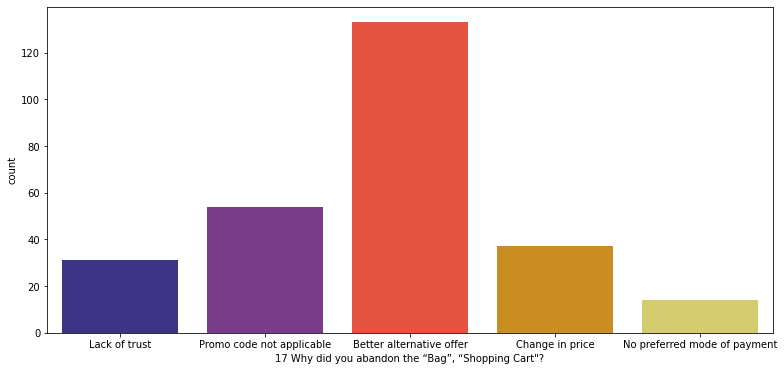

In [27]:
plt.figure(figsize = (13,6))
d=sns.countplot(x='17 Why did you abandon the “Bag”, “Shopping Cart"?',palette="CMRmap",data=df)

- People who seem to have abandoned the shopping cart "sometimes" were most in number than the people who have abandoned the shopping cart "very frequently."
- This abandonment was mostly because of the better alternatives they found elsewhere or change in the price.
- Other reasons to have made people to abandon their shopping carts were Lack of trust, promo code not available, No prefered mode of payment.

<AxesSubplot:title={'center':'Ease of understanding content of website'}, xlabel='18 The content on the website must be easy to read and understand', ylabel='count'>

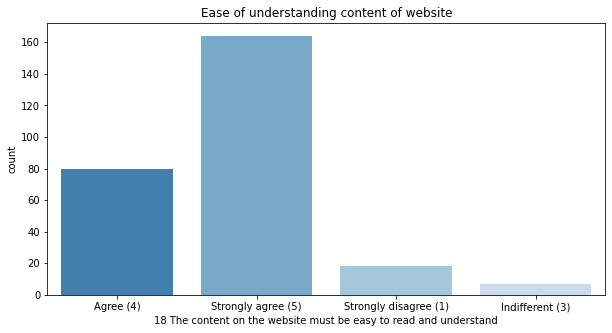

In [28]:
plt.figure(figsize = (10,5))
plt.title("Ease of understanding content of website")
sns.countplot(x='18 The content on the website must be easy to read and understand',palette="tab20c",data=df)

Most of the customers strongly agreed when it came to the ease of understanding the website contents. While least of the cutomers were indifferent to the asked question.

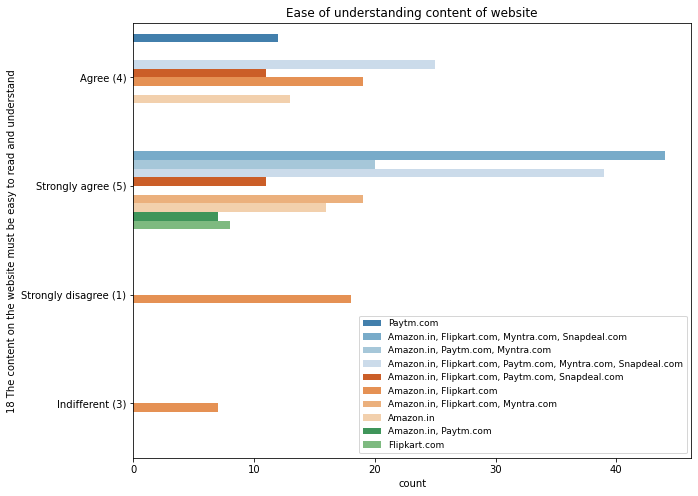

In [29]:
plt.figure(figsize = (10,8))
plt.title("Ease of understanding content of website")
sns.countplot(y='18 The content on the website must be easy to read and understand',hue="Easy to use website or application",
              palette="tab20c",data=df)
plt.legend(prop = {'size':9}, loc = 'lower right')

- People were able to understand the content of the website pretty easily.
- Few of the population was in disagreement about not being able to understand the website content of Amazon and Flipkart.

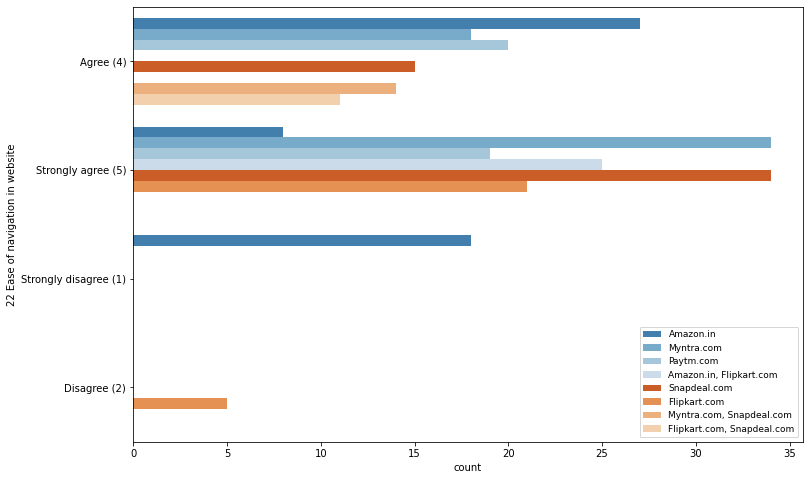

In [30]:
plt.figure(figsize = (12,8))
sns.countplot(y='22 Ease of navigation in website',hue="Frequent disruption when moving from one page to another",palette="tab20c",data=df)
plt.legend(prop = {'size':9}, loc = 'lower right')

Since most people strongly agreed that their ease of navigation in the websites, very less people were in disagreement, where they couldn’t seem to have found the ease while navigating Flipkart

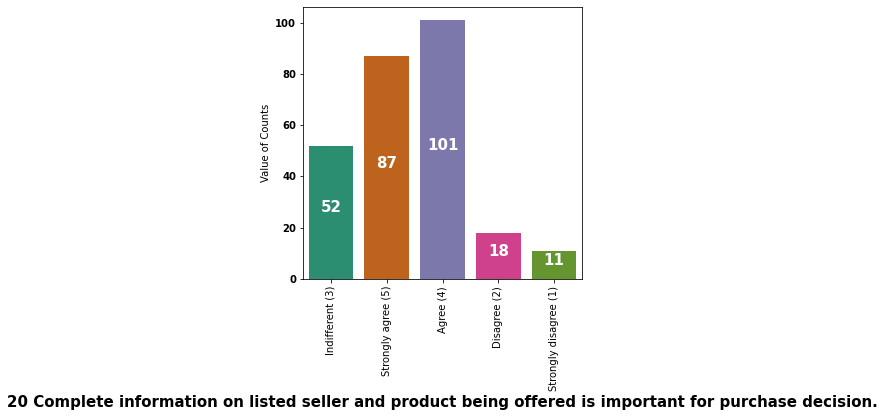

In [31]:
plt.figure(figsize = (5,5))
col_name = '20 Complete information on listed seller and product being offered is important for purchase decision.'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette = 'Dark2')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()],
            horizontalalignment = 'center', fontweight = 'bold', fontsize = 15, color = 'w')
    index += 1
plt.xlabel(col_name, fontsize = 15, fontweight = 'bold')
plt.ylabel(f'Value of Counts', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

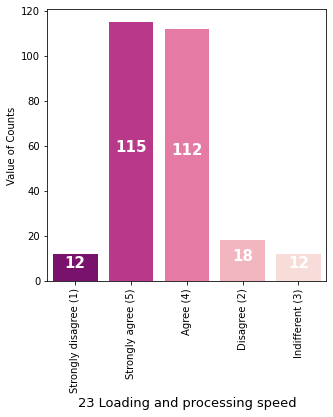

In [32]:
plt.figure(figsize = (5,5))
col_name = '23 Loading and processing speed'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette = 'RdPu_r')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()],
            horizontalalignment = 'center', fontweight = 'bold', fontsize = 15, color = 'w')
    index += 1
plt.xlabel(col_name, fontsize = 13)
plt.ylabel(f'Value of Counts', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

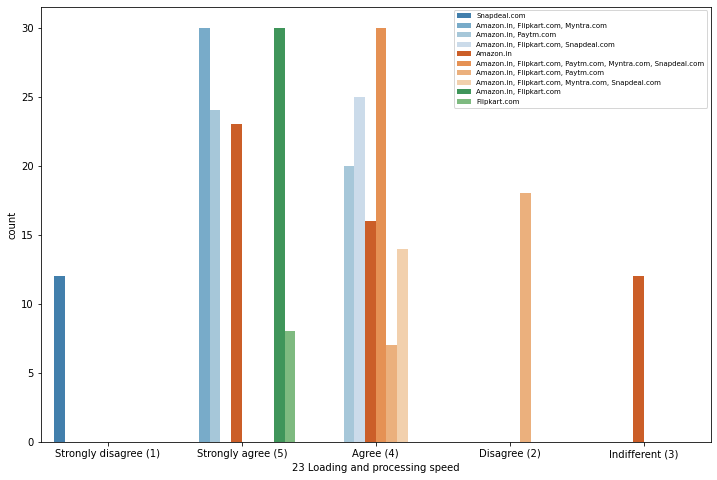

In [33]:
plt.figure(figsize = (12,8))
sns.countplot(x='23 Loading and processing speed',hue='Fast loading website speed of website and application',palette="tab20c",data=df)
plt.legend(prop = {'size':7}, loc = 'upper right')

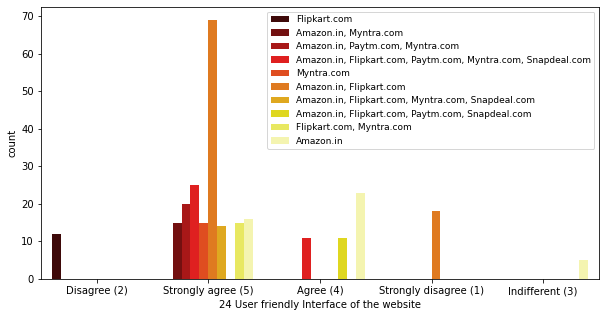

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x='24 User friendly Interface of the website',hue="Visual appealing web-page layout", palette = 'hot', data=df)
plt.legend(prop = {'size':9}, loc = 'upper right')

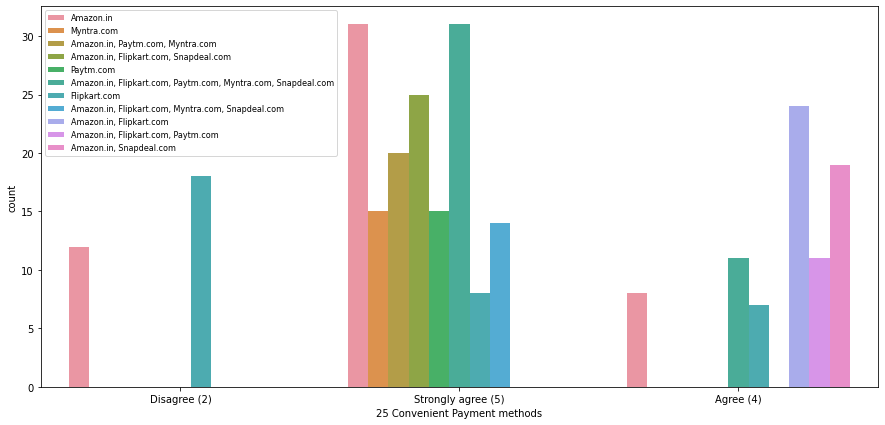

In [35]:
plt.figure(figsize = (15,7))
sns.countplot(x='25 Convenient Payment methods',hue='Security of customer financial information', data=df)
plt.legend(prop = {'size':8}, loc = 'upper left')

Since most of the customers agreed to the convinient payment methods,they were satisfied with their financial security while shopping on Amazon the most, followed by Flipkart, Myntra, PayTm and Snapdeal collectively.

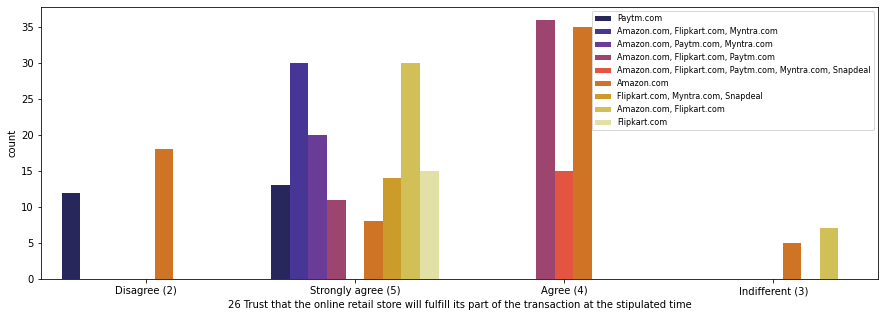

In [36]:
plt.figure(figsize = (15,5))
sns.countplot(x='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',hue="Quickness to complete purchase",palette="CMRmap",data=df)
plt.legend(prop = {'size':8}, loc = 'upper right')

Here, maximum population agreed to the fact that they can trust the online retail store to fulfill the transcation within the given time period.

- Here also most were in favour of Amazon, foloowed by flipkart, amazon and Paytm collectively.
- The ones who strongly agreed were in favour of Amazon, Flipkart and Myntra.

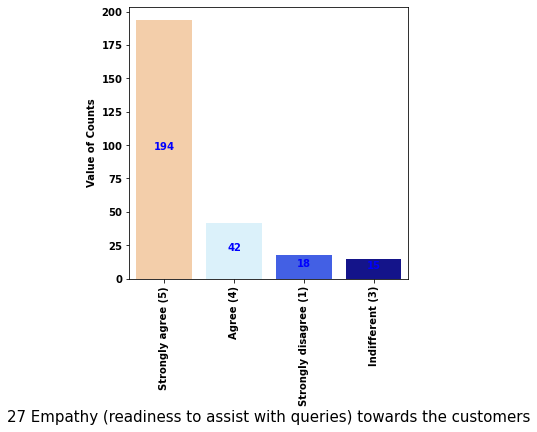

In [70]:
plt.figure(figsize = (5,5))
col_name = '27 Empathy (readiness to assist with queries) towards the customers'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette = 'flag')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()],
            horizontalalignment = 'center', fontweight = 'bold', fontsize = 10, color = 'b')
    index += 1
plt.xlabel(col_name, fontsize = 15)
plt.ylabel(f'Value of Counts', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 90, fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

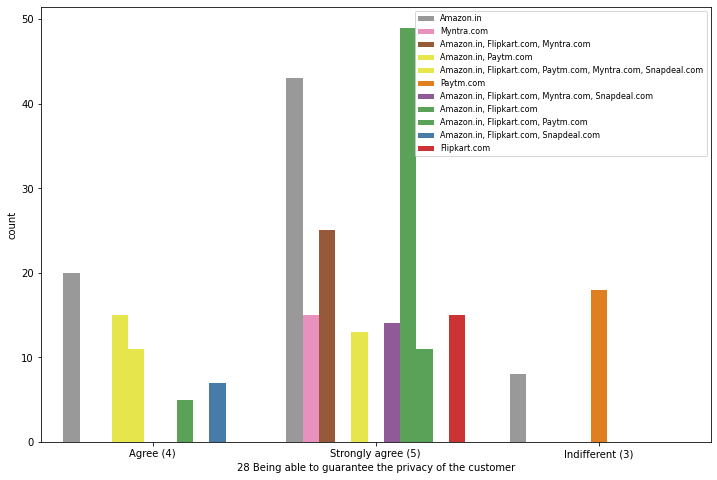

In [38]:
plt.figure(figsize = (12,8))
sns.countplot(x="28 Being able to guarantee the privacy of the customer",hue="Privacy of customers’ information", palette = 'Set1_r', data=df)
plt.legend(prop = {'size':8}, loc = 'upper right')

- When the privacy of customer information was concerned, most of the customers strongly agreed that, they got the privacy when shopping online.
- Amazon and Flipkart were the most trusted followed by Amazon in the survey.

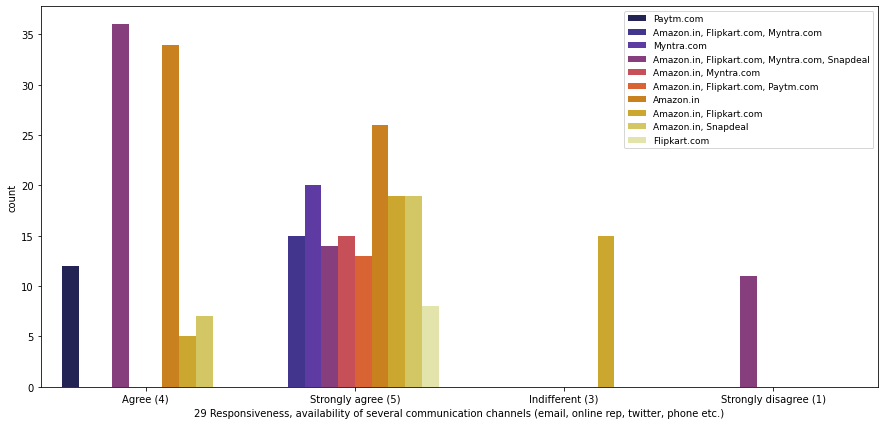

In [39]:
plt.figure(figsize = (15,7))

a=sns.countplot(x='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
                hue='Presence of online assistance through multi-channel', palette="CMRmap",data=df)
plt.legend(prop = {'size':9}, loc = 'upper right')

The survey shows that reaching to the customer support for queries when shopping online, maximum people agreed that they were able to get support, while maximum people again agreed that the assistance through the multichannel of email, phone etc were satisfactory with Amazon.

<AxesSubplot:xlabel='30 Online shopping gives monetary benefit and discounts', ylabel='count'>

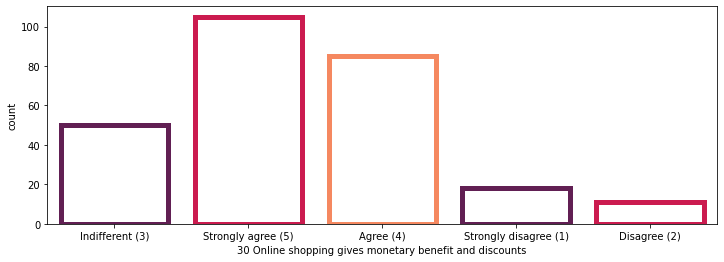

In [40]:
plt.figure(figsize = (12,4))

sns.countplot(x='30 Online shopping gives monetary benefit and discounts',data=df,facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("rocket", 3))

Here also, most customers strongly agreed that they got monetary benefits and discounts while shopping online.

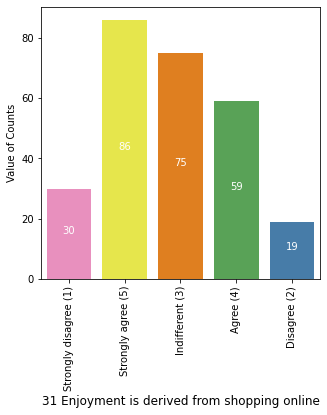

In [41]:
plt.figure(figsize = (5,5))
col_name = "31 Enjoyment is derived from shopping online"
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette = 'Set1_r')

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()],
            horizontalalignment = 'center', fontsize = 10, color = 'w')
    index += 1
plt.xlabel(col_name, fontsize = 12)
plt.ylabel(f'Value of Counts', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Maximum people (86%) in the survey agreed that they recieved enjoyment from shopping online, while 75% weer indifferent and were of no views

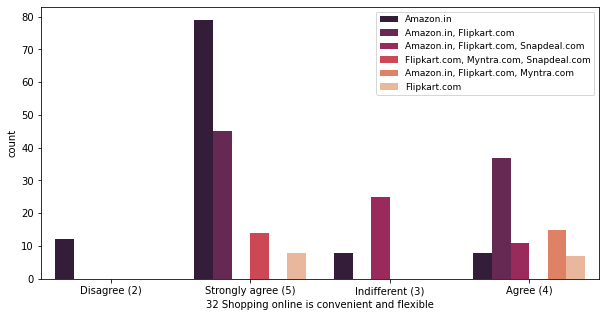

In [42]:
plt.figure(figsize = (10,5))
sns.countplot(x="32 Shopping online is convenient and flexible",hue='Speedy order delivery ', data=df, palette="rocket")
plt.legend(prop = {'size':9}, loc = 'upper right')

Again maximum people agreed strongly that the shopping online experience is convinient and flexible, while the best speedy delivery was offerred by Amazon.

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

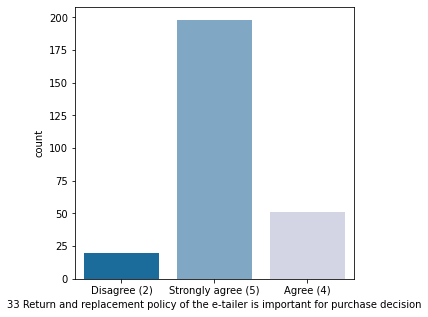

In [43]:
plt.figure(figsize = (5,5))
sns.countplot(x='33 Return and replacement policy of the e-tailer is important for purchase decision',palette="PuBu_r",data=df)

Return and replacement policy offered by the online purchase were important while making any purchase decision this was mostly Strongly agreed by the customers.

<AxesSubplot:xlabel='34 Gaining access to loyalty programs is a benefit of shopping online', ylabel='count'>

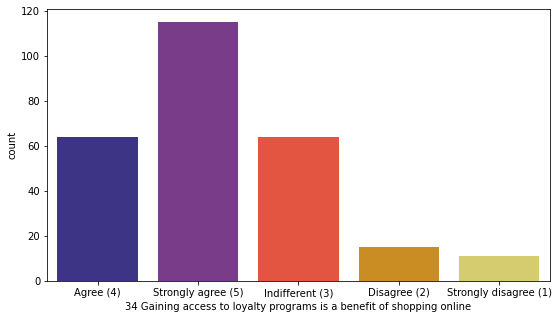

In [44]:
plt.figure(figsize = (9,5))
sns.countplot(x='34 Gaining access to loyalty programs is a benefit of shopping online',palette="CMRmap",data=df)

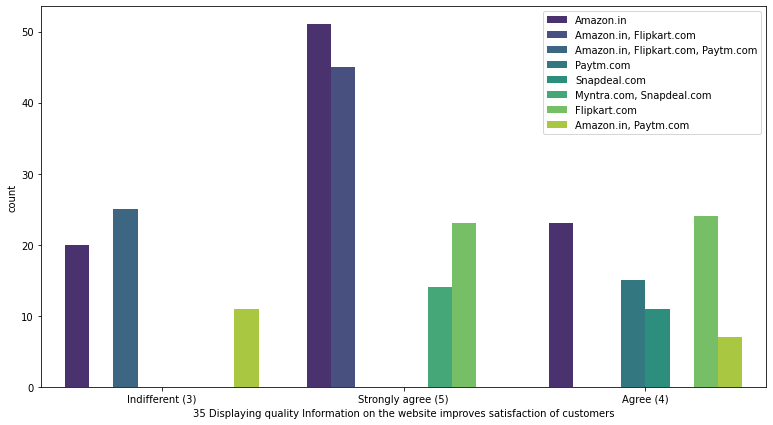

In [45]:
plt.figure(figsize = (13,7))
sns.countplot(x='35 Displaying quality Information on the website improves satisfaction of customers',
              hue='Website is as efficient as before',palette="viridis",data=df)
plt.legend(prop = {'size':10}, loc = 'upper right')

- People strongly agreed that displaying the quality information wrt products made their shopping experience better.
- Amazon was the most voted for this point , where as Flipkart followed.

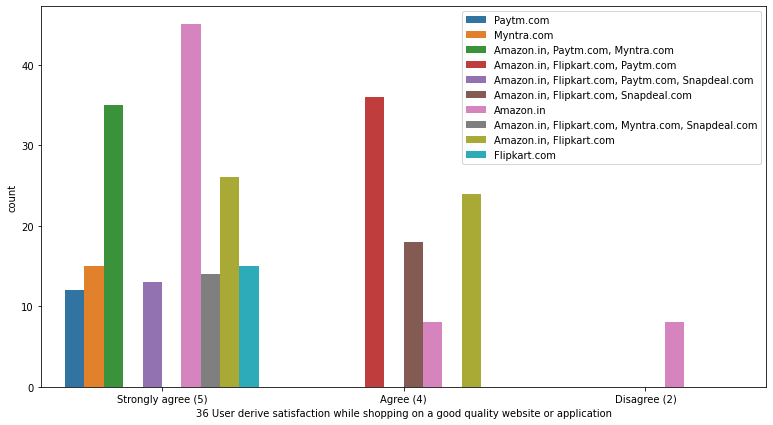

In [46]:
plt.figure(figsize = (13,7))
sns.countplot(x='36 User derive satisfaction while shopping on a good quality website or application',
              hue='Reliability of the website or application',data=df)
plt.legend(prop = {'size':10}, loc = 'upper right')

Maximum Customers strongly agreed to the idea that shopping on a good quality website gives them satisfaction, and here also AMazon was the nest choice for the customers to shop from online.

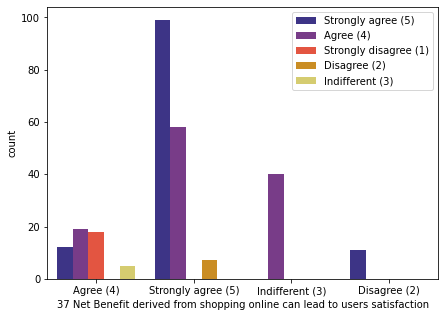

In [47]:
plt.figure(figsize = (7,5))
sns.countplot(x='37 Net Benefit derived from shopping online can lead to users satisfaction', 
                hue='38 User satisfaction cannot exist without trust',
                palette="CMRmap",data=df)
plt.legend(prop = {'size':10}, loc = 'upper right')

Maximum customers strongly agreed to teh fact that Net Benefit derived from shopping online can lead to users satisfaction and User satisfaction cannot exist without trust.

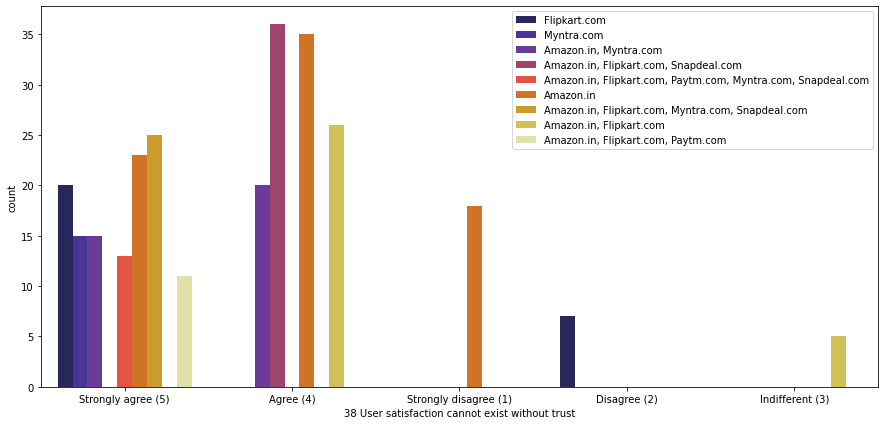

In [48]:
plt.figure(figsize = (15,7))
sns.countplot(hue='Perceived Trustworthiness', 
                x='38 User satisfaction cannot exist without trust',
                palette="CMRmap",data=df)
plt.legend(prop = {'size':10}, loc = 'upper right')

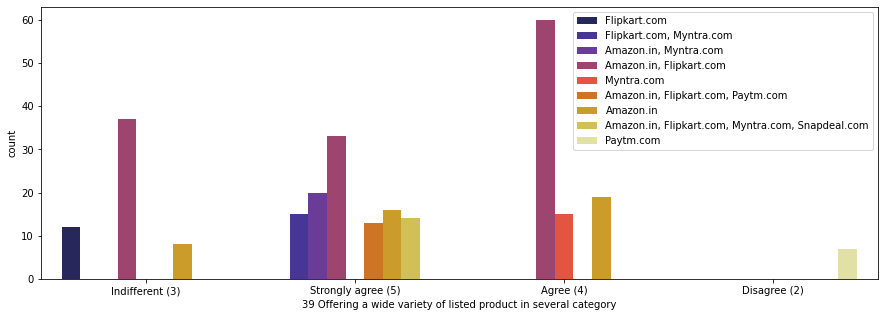

In [72]:
plt.figure(figsize = (15,5))
sns.countplot(x='39 Offering a wide variety of listed product in several category', 
                hue='Wild variety of product on offer',
                palette="CMRmap",data=df)
plt.legend(prop = {'size':10}, loc = 'upper right')

Here most customers again strongly agree that offering a wide variety of products was experienced in the online shopping and the best website to shop from for them was Amazon and Flipkart

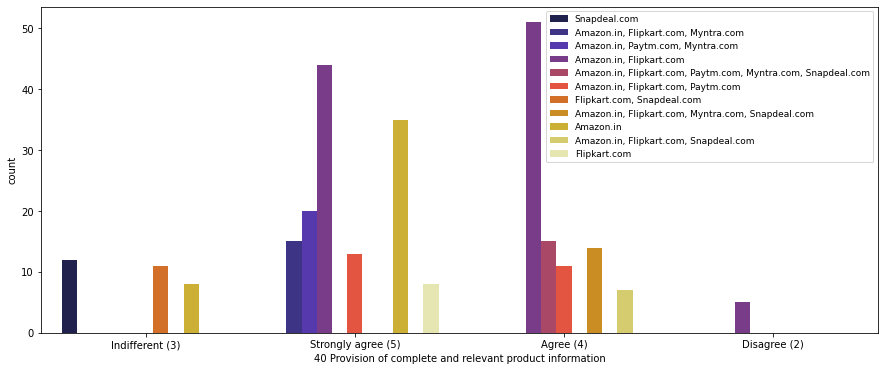

In [50]:
plt.figure(figsize = (15,6))
sns.countplot(hue='Complete, relevant description information of products', 
                x='40 Provision of complete and relevant product information',
                palette="CMRmap",data=df)
plt.legend(prop = {'size':9}, loc = 'upper right')

<AxesSubplot:xlabel='41 Monetary savings', ylabel='count'>

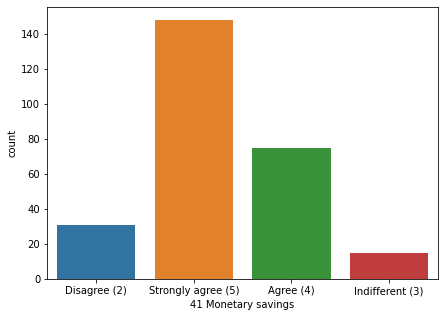

In [51]:
plt.figure(figsize = (7,5))
sns.countplot(x='41 Monetary savings',data=df)

Maximum customers got monetray savings via online shopping.

<AxesSubplot:xlabel='42 The Convenience of patronizing the online retailer', ylabel='count'>

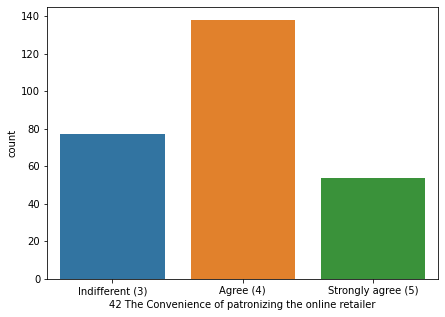

In [52]:
plt.figure(figsize = (7,5))
sns.countplot(x='42 The Convenience of patronizing the online retailer',data=df)

<AxesSubplot:xlabel='43 Shopping on the website gives you the sense of adventure', ylabel='count'>

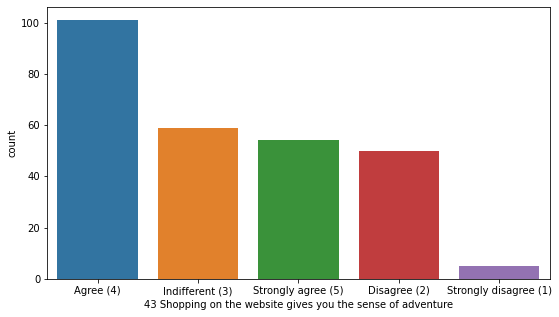

In [53]:
plt.figure(figsize = (9,5))
sns.countplot(x='43 Shopping on the website gives you the sense of adventure',data=df)

For almost 100% of the customers who were surveyed, they agreed with the point that Shopping on the website gives you the sense of adventure

<AxesSubplot:xlabel='44 Shopping on your preferred e-tailer enhances your social status', ylabel='count'>

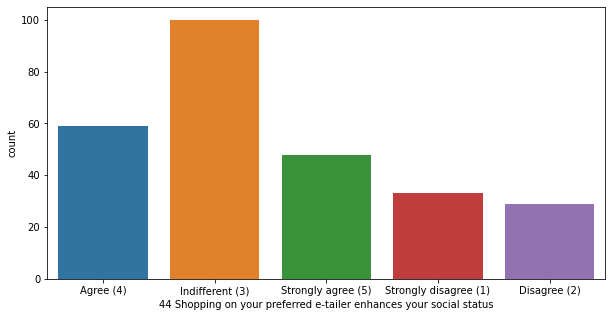

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(x='44 Shopping on your preferred e-tailer enhances your social status',data=df)

max people seems like they didnt care about if shopping from any etailer would add to the social status.

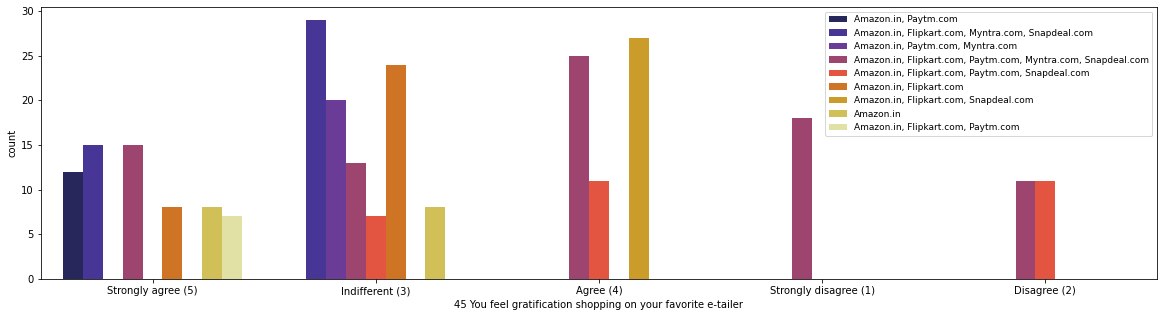

In [74]:
plt.figure(figsize = (20,5))
sns.countplot(x='45 You feel gratification shopping on your favorite e-tailer', 
              hue='From the following, tick any (or all) of the online retailers you have shopped from;',
                
                palette="CMRmap",data=df)
plt.legend(prop = {'size':9}, loc = 'upper right')

- Even though most pople were indifferent to the idea of feeling gratification shopping on their favorite etailer, they seem to be recommending Amazon, Flipkart, Myntra and Snapdeal for shopping online.
- While those in agreement, seem to recommend Amazon the most.

<AxesSubplot:xlabel='46 Shopping on the website helps you fulfill certain roles', ylabel='count'>

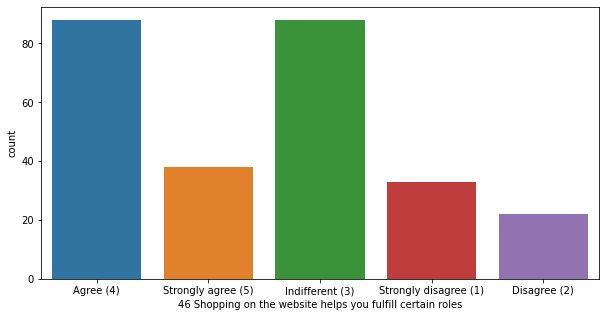

In [56]:
plt.figure(figsize = (10,5))
sns.countplot(x='46 Shopping on the website helps you fulfill certain roles',data=df)

For the question Shopping on the website helps you fulfill certain roles, asked to the customers, equal number of customers agreed and were indifferent to it too.

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

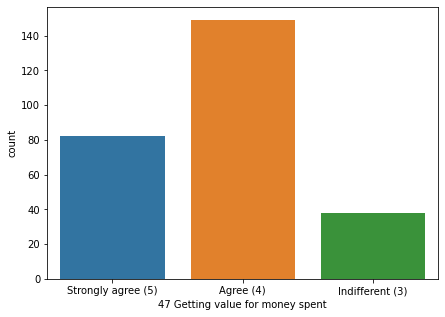

In [57]:
plt.figure(figsize = (7,5))
sns.countplot(x='47 Getting value for money spent',data=df)

Maximum customers agreed that they were getting value for the money they spent while shopping online because of the discounts, variety of products and deals may be.

<AxesSubplot:xlabel='count', ylabel='Easy to use website or application'>

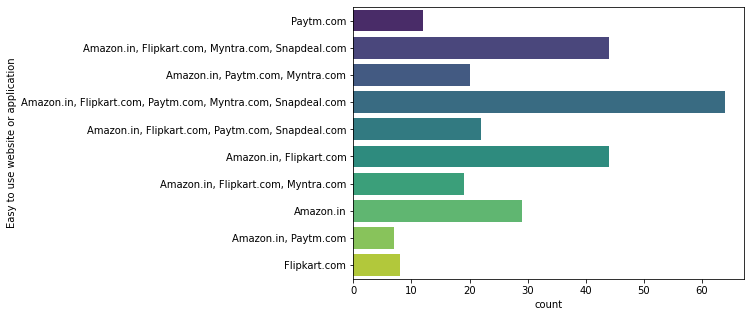

In [58]:
plt.figure(figsize = (7,5))
sns.countplot(y='Easy to use website or application',palette='viridis', data=df)

Most people preferred Amazon, Flipkart, Paytm, Snapdeal when it came to using the application or website with ease, while almost equal number of customers voted for Amazon, Flipkart, Myntra Snapdeal combination, And Amazon, flipkart combination.

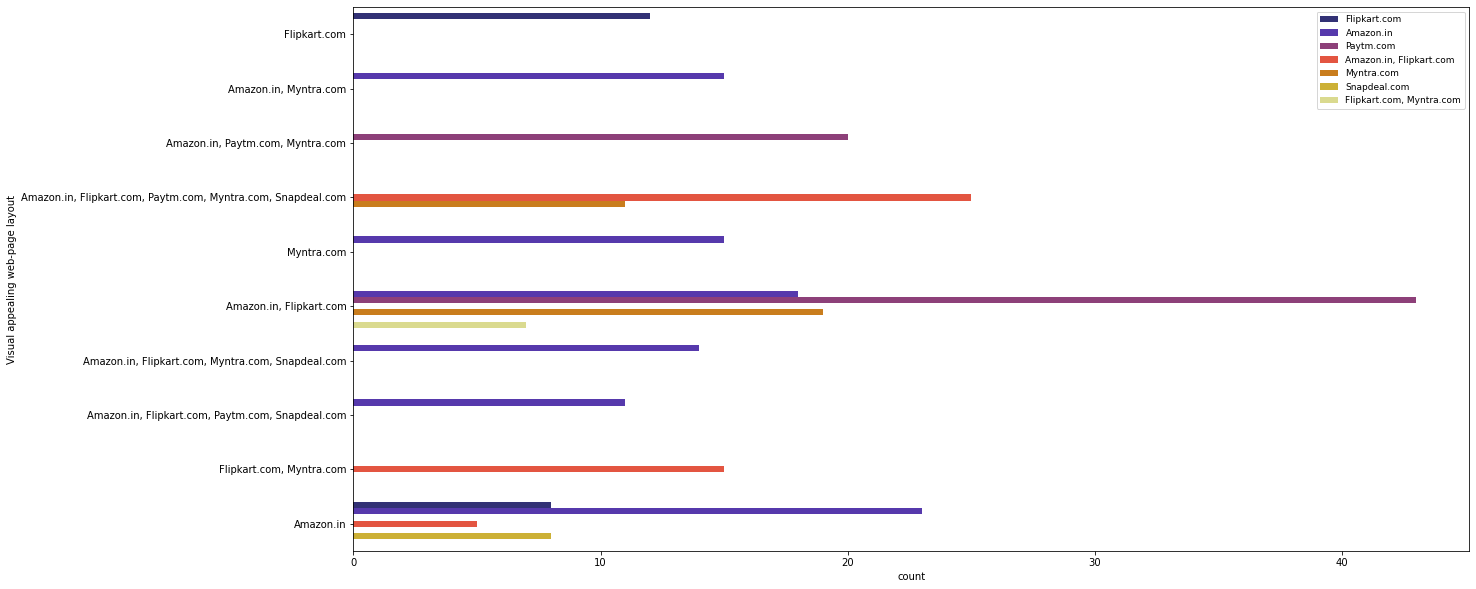

In [59]:
plt.figure(figsize = (20,10))
sns.countplot(y='Visual appealing web-page layout', 
                hue='Change in website/Application design',
                palette="CMRmap",data=df)
plt.legend(prop = {'size':9}, loc = 'upper right')

For the visual appealing webpage layout, maximum people preferred to use Amazon than the other e-tail sites.

<AxesSubplot:xlabel='count', ylabel='Security of customer financial information'>

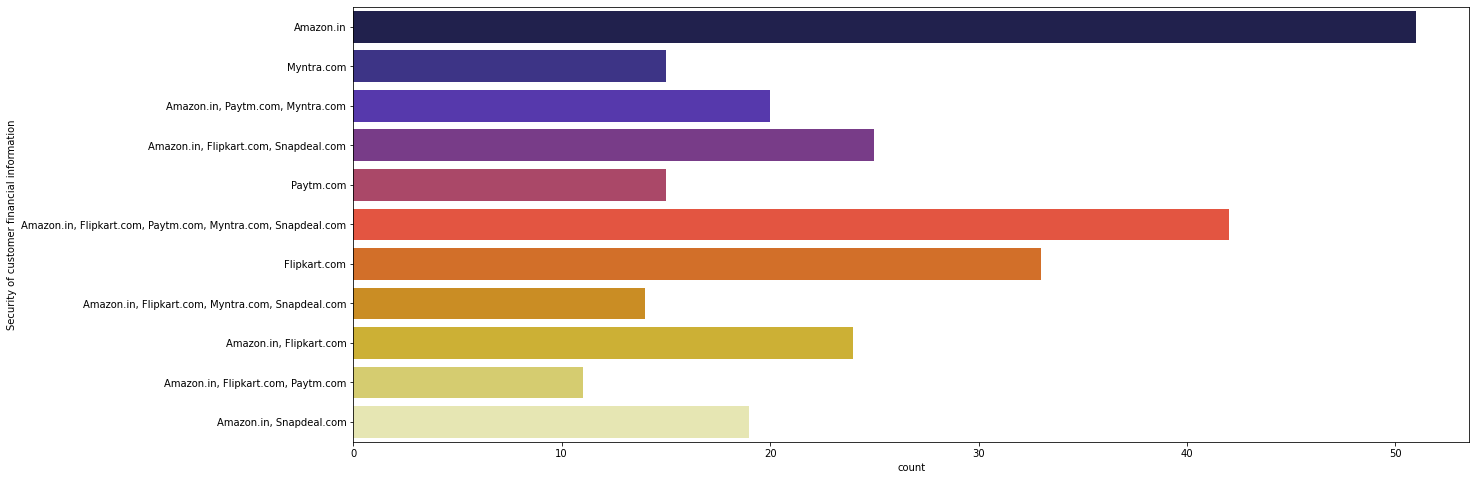

In [60]:
plt.figure(figsize = (20,8))
sns.countplot(y='Security of customer financial information',palette="CMRmap",data=df)

When it came to the customer's finacial security aspect, the ustomers preferred shopping on Amazon the most.

<AxesSubplot:xlabel='count', ylabel='Longer time to get logged in (promotion, sales period)'>

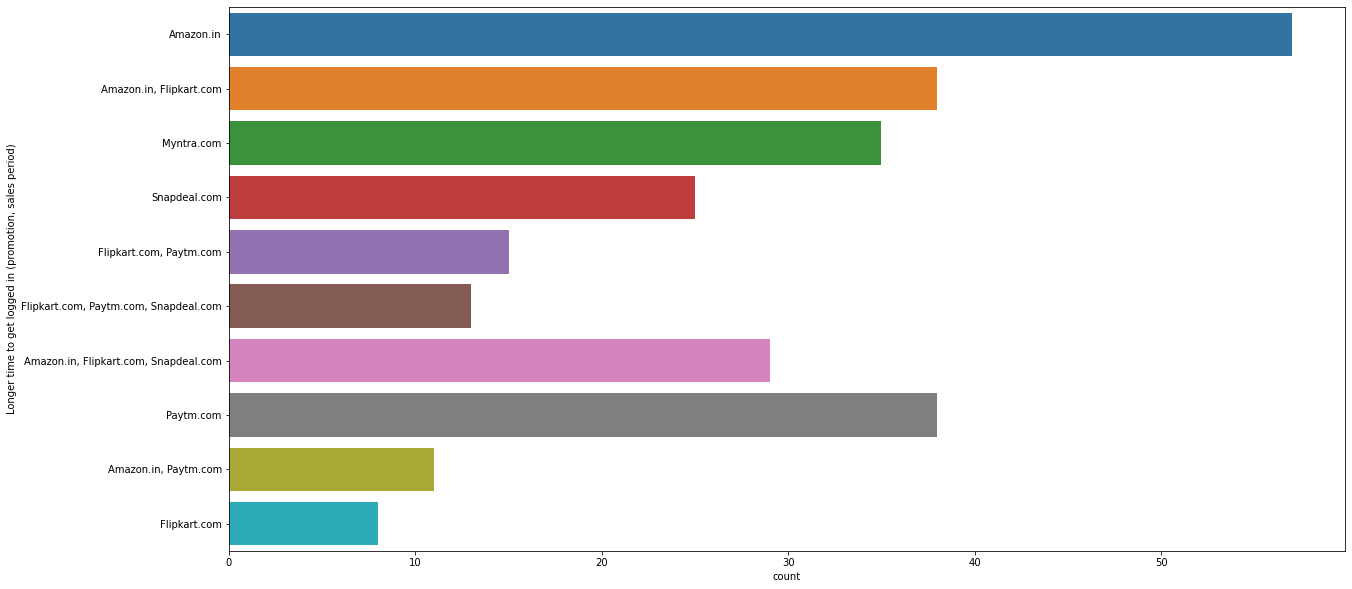

In [61]:
plt.figure(figsize = (20,10))
sns.countplot(y='Longer time to get logged in (promotion, sales period)',data=df)

In case of festivales or sale son any retialer site, Amazon seem to the site where people faced problems logging in.

<AxesSubplot:xlabel='count', ylabel='Longer time in displaying graphics and photos (promotion, sales period)'>

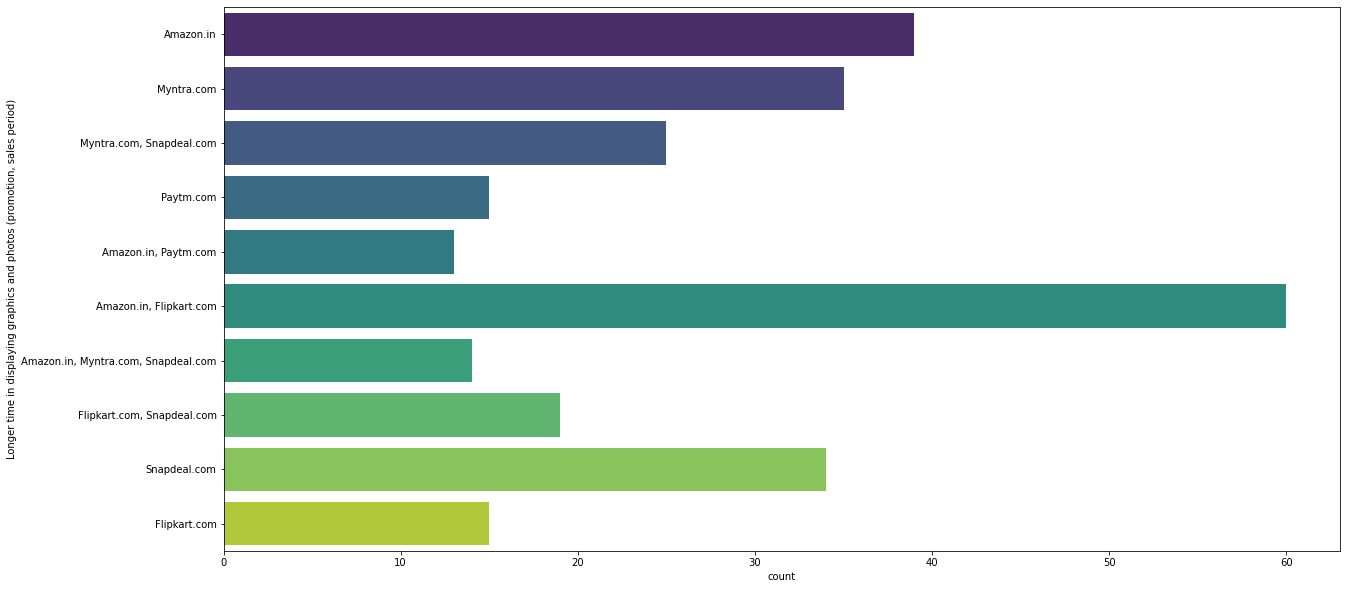

In [62]:
plt.figure(figsize = (20,10))
sns.countplot(y='Longer time in displaying graphics and photos (promotion, sales period)',palette='viridis',data=df)

Amazon and flipkart seem to be facing issues as the per the surveys wrt loading the pade during any festivals or deals.

<AxesSubplot:xlabel='count', ylabel='Late declaration of price (promotion, sales period)'>

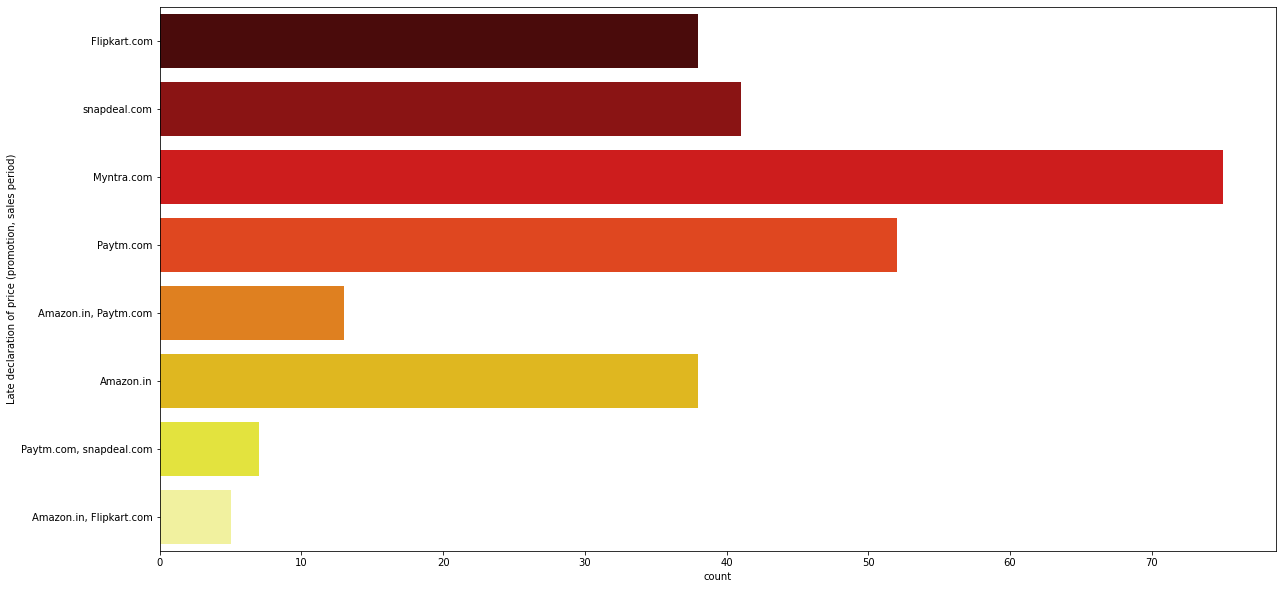

In [63]:
plt.figure(figsize = (20,10))
sns.countplot(y='Late declaration of price (promotion, sales period)',palette='hot',data=df)

As per the customer survey, Myntra seem to be the most voted site in late declaration of price during the  deals and festivals.

<AxesSubplot:xlabel='count', ylabel='Longer page loading time (promotion, sales period)'>

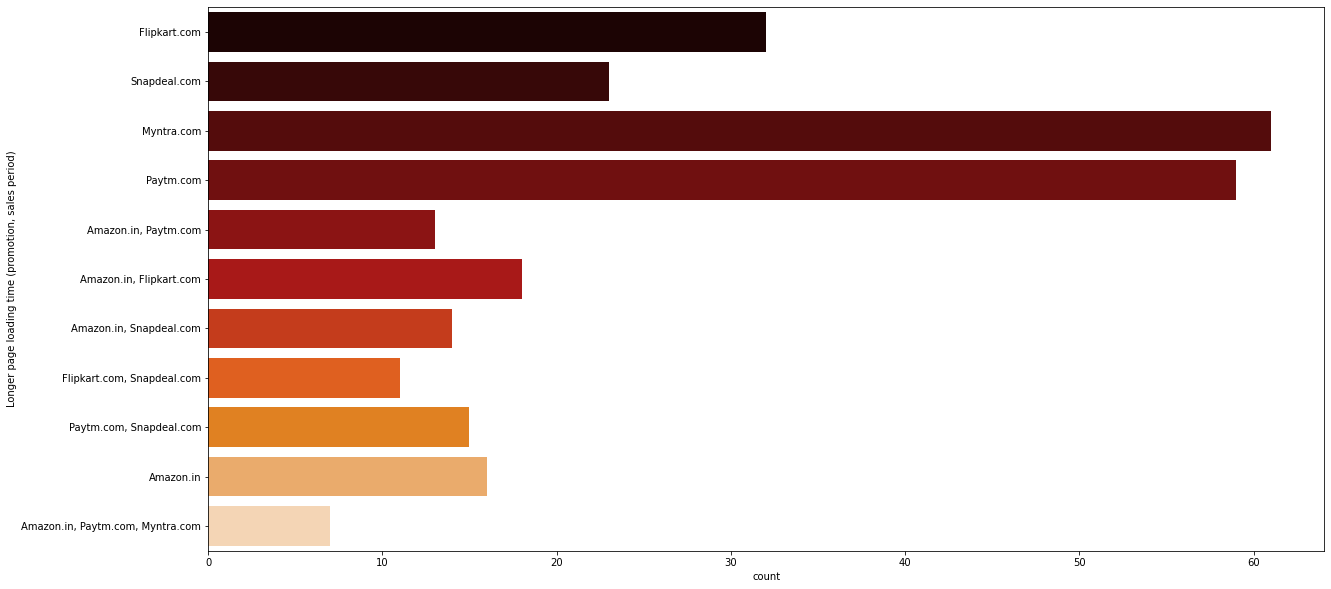

In [64]:
plt.figure(figsize = (20,10))
sns.countplot(y='Longer page loading time (promotion, sales period)',palette='gist_heat',data=df)

Loading time of page seemed to be high on Myntra and Paytm, as per the customer survey, while it was least when Amazon was in picture.

<AxesSubplot:xlabel='count', ylabel='Limited mode of payment on most products (promotion, sales period)'>

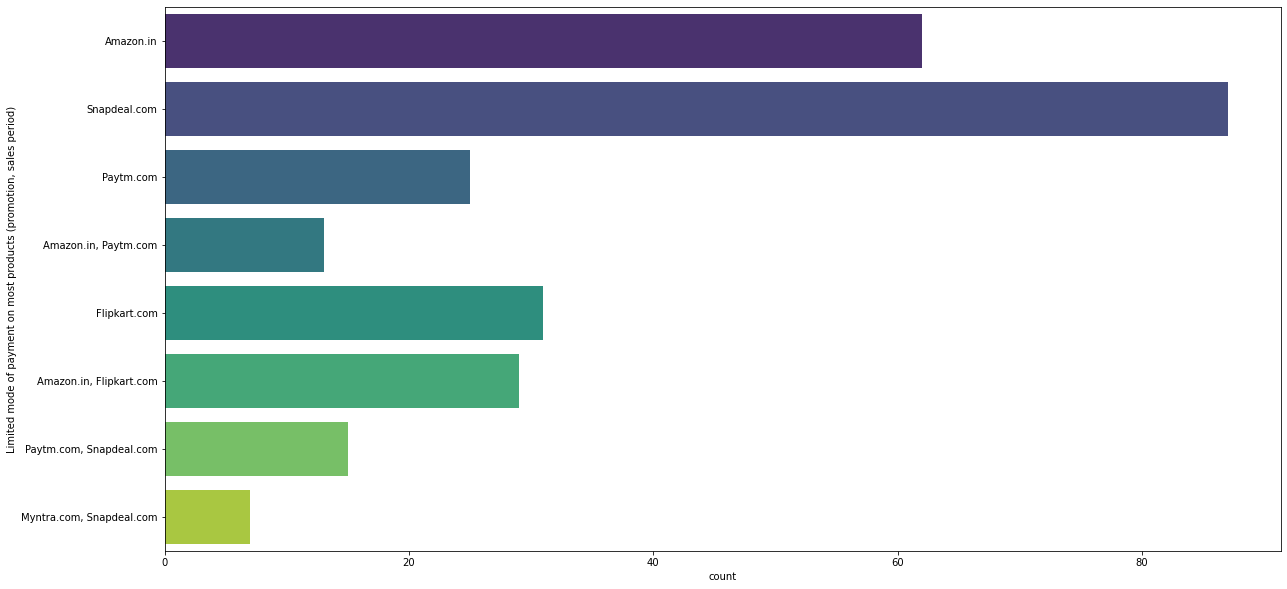

In [65]:
plt.figure(figsize = (20,10))
sns.countplot(y='Limited mode of payment on most products (promotion, sales period)',palette='viridis',data=df)

Snapdeal showed the most limited mode of payment on products, while Myntra showed many options for mode of payment during the deal.promotions/festivals.

<AxesSubplot:xlabel='count', ylabel='Longer delivery period'>

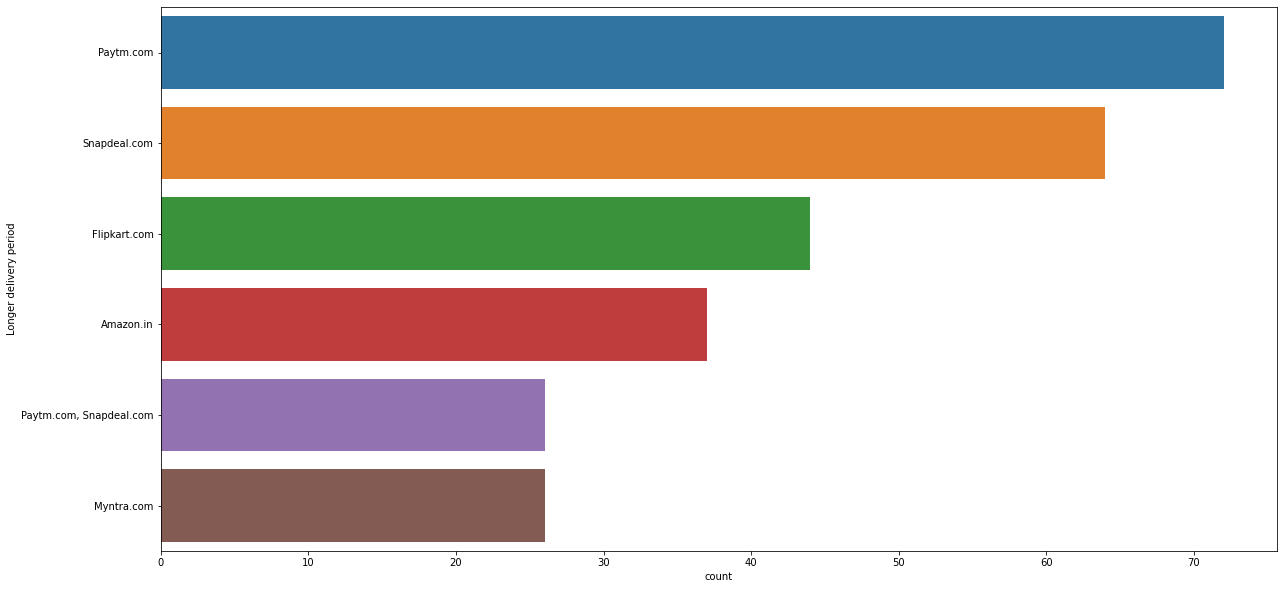

In [66]:
plt.figure(figsize = (20,10))
sns.countplot(y='Longer delivery period',data=df)

Myntra delivered the products in least time, while Paytm had a longer delivery period as per the customers.

<AxesSubplot:xlabel='count', ylabel='Change in website/Application design'>

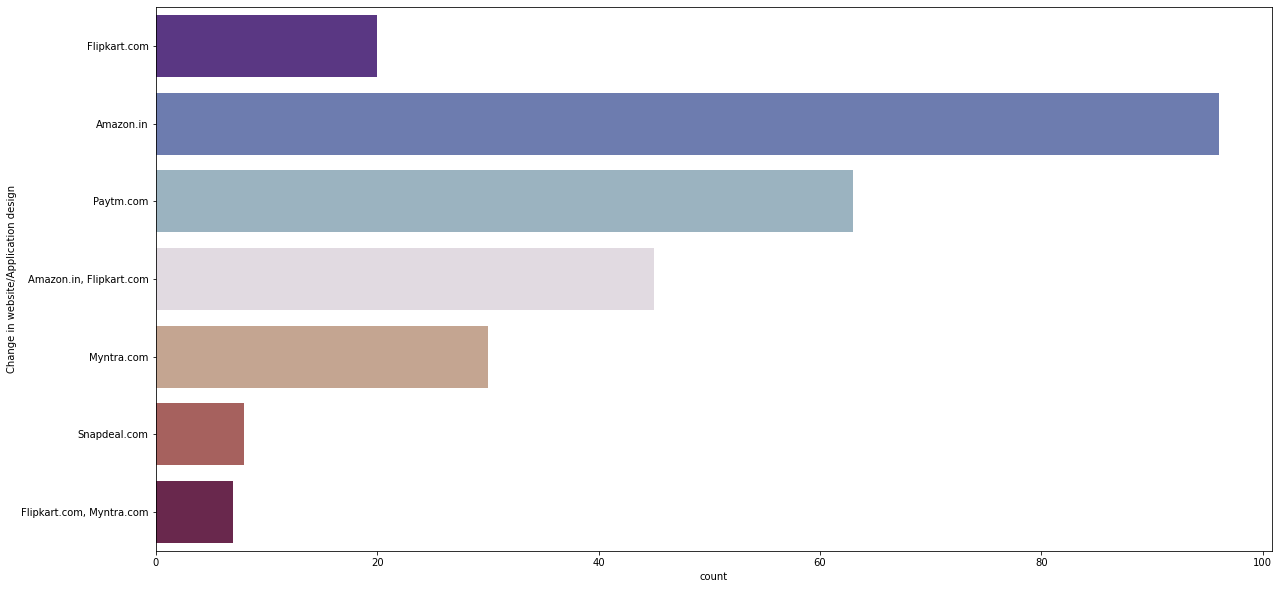

In [67]:
plt.figure(figsize = (20,10))
sns.countplot(y='Change in website/Application design',palette='twilight_shifted',data=df)

<AxesSubplot:xlabel='count', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

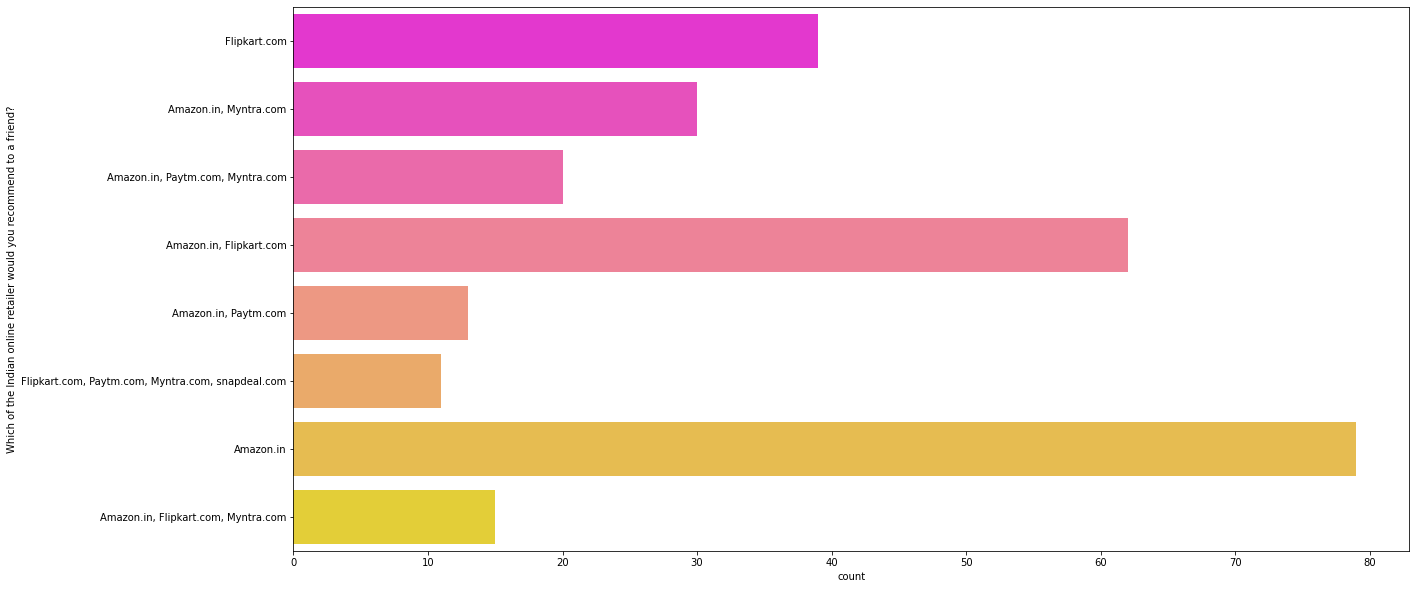

In [68]:
plt.figure(figsize = (20,10))
sns.countplot(y='Which of the Indian online retailer would you recommend to a friend?',palette='spring',data=df)

Amazon seem sto be winner ehere, where customers were of the view that they would recommend their friends to shop online from Amzaon, followed by both Amazon and Flipkart.

#### Conclusion:

1.	Customers between 21-50 years old were more frequent online shoppers.
2.	Females shopped more in these groups.
3.	We can safely say that between 21-50 age, student and working class are present. So online shopping can be more preferred by these groups as wide variety is there and saves time as compared to shopping in malls etc. physically.
4.	Metro cities shopped more online. Noida and Delhi men shopped more online because must not be having time to visit the shops and buy.
5.	Solan And Meerut have no male shoppers while Moradabad and Bulandshahr have only female shoppers.
6.	Noida and Bangalore have more female shoppers may be because these are huge cities and variety of products can be found online only.
7.	Least population preferred online shopping in Moradabad, Bulandshahr and Gurgaon. Although Gurgaon showed an interesting observation that people above 51 years shopped online more.
8.	The 5 cities involved in online shopping were Delhi>Greater Noida>Bangalore>Noida>Karnal
9.	Delhi showed population between 41-50 to shop most, Greater Noida had population between 31-40 yrs. old, Bangalore - 21-30, Noida:31-40yo, And Karnal 21-30yo.
10.	The pin code 201308 (Greater Noida), followed by 132001 (Karnal), followed by 201310(Ghaziabad) were the pin codes from where people shopped more online. while least were from the pin codes 203202 (Bulandshahr),203207, 560001 (Bangalore).
11.	Most people have been shopping online since more than 4 years. And least people were shopping online for 1-2 years.
12.	In the more than 4 years category, maximum people have shopped around 40 times in the past 1 years, followed by people who have shopped more than40 times in last 1 year.
13.	The least interest people who shopped online seem to have shopped less than 10 times in last 1 year.
14.	Most people who shopped online preferred shopping online via mobile internet, while least people used the traditional Dial-up method to use for online shopping.
15.	Maximum people preferred to use smartphone to shop online for their needs, followed by laptop. Of all the devices people used for online shopping, Windows/Windows mobile OS was mostly used.
16.	Only in the Tablet device, Android OS was used, while desktop device showed the use of Windows only.
17.	Smartphone showed maximum use of Android OS followed by iOS/MAC.
18.	Laptop device as usual showed maximum use of Windows OS, and very less iOS use by the people.
19.	The browsers which were used by the people for online shopping were Google Chrome, Safari, Opera, and Mozilla Firefox. From this maximum use of Google Chrome was done on a smartphone and Laptop for online purchases.
20.	Laptop users used safari the least, while smartphone users used Firefox the least. Desktop and tablet users only used Chrome. Opera was only used was smartphone users.
21.	Almost 80% of the population used search engine and apps of the store to get to the retail store website. Least used the means of social media to reach their online retail store.  Around 70% used URL of the store too. Email was used by the population but it was merely around 20%.
22.	Search engine was the most used channel by the population to get to their favorite online store for shopping, while Digital Advertising played a very less role in this as people used these channels like Content marketing and Display Adverts very less, compared to using the search engine.
23.	Most people seem to have utilized more than 15 mins to make a single purchase. While around 17% of the people made their purchase decision between 1-5 mins.
24.	Maximum people preferred to pay via Credit/debit cards when it came to online shopping, while least of the population used e-wallets. Mediocre people paid by COD
25.	Of the max use of cards, people seem to have used the cards more on Amazon, Flipkart and Myntra. In E wallets, most preferred using the e-wallets on Paytm and Myntra. CoD was mostly used on the shopping websites Amazon, Flipkart, Myntra and Snapdeal.
26.	Most of the online shoppers abandoned their carts without making the purchases, sometimes. People who seem to have abandoned the shopping cart "sometimes" were most in number than the people who have abandoned the shopping cart "very frequently." This abandonment was mostly may be because of the better alternatives they found elsewhere or change in the price. Other reasons to have made people to abandon their shopping carts were Lack of trust, promo code not available, No preferred mode of payment.
27.	People were able to understand the content of the website pretty easily. Few of the population was in disagreement about not being able to understand the website content of Amazon and Flipkart.
28.	Since most of the customers agreed to the convenient payment methods, they were satisfied with their financial security while shopping on Amazon the most, followed by Flipkart, Myntra, Paytm and Snapdeal collectively.
29.	Maximum population agreed to the fact that they can trust the online retail store to fulfill the transaction within the given time period. Here also most were in favor of Amazon, followed by Flipkart, amazon and Paytm collectively. The ones who strongly agreed were in favor of Amazon, Flipkart and Myntra.
30.	When the privacy of customer information was concerned, most of the customers strongly agreed that, they got the privacy when shopping online. Amazon and Flipkart were the most trusted followed by Amazon in the survey.
31.	The survey showed that reaching to the customer support for queries when shopping online, maximum people agreed that they were able to get support, while maximum people again agreed that the assistance through the multichannel of email, phone etc were satisfactory with Amazon.
32.	Maximum people (86%) in the survey agreed that they received enjoyment from shopping online, while 75% were indifferent and were of no views.
33.	Maximum people agreed strongly that the shopping online experience is convenient and flexible, while the best speedy delivery was offered by Amazon.

Over all, maximum customers thought that shopping from Amazon was the best given the deals/promotions, ease of website navigation/loading of page/ Trust on the e-tailer, resolution of issues by the customer care, recommendation to friends etc. While Flipkart, Myntra followed after Amazon in these aspects. Snapdeal and Paytm were least opted by the customers for online shopping. 
 
These were the observations which can be concluded from the survey performed with Indian Population keeping in mind the online shopping. There are few things which each of the mentioned companies can change to increase their efficiency. 

Online shopping is based on following factors:
- Variety of products.
- Ease of navigating the website.
- Time in delivery of products.
- The return and refund policy along with reachable customer care 24*7.
- Trusted portal.
- Deal/promotions/festivals offering discounts which adds to monetary gain.
- Payment options which are feasible.

If the mentioned companies can work on these aspects, shopping experience for the customer can be much for happier and satisfactory.


## Thank you!